In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy as sp

import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import metrics

from scipy import stats

from tqdm import tqdm

from sklearn.datasets import load_boston

from sklearn.datasets import load_iris

from sklearn.datasets import load_diabetes

from sklearn.datasets import load_wine

import pickle

from scipy.optimize import minimize

#Mylib



In [2]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 40
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=24
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

In [3]:
n = 4

In [4]:
def func_1D_mean_approx(mean, featur, w):
    return w[0] -(w[1]**2)*np.exp(-(w[2]**2)*mean)-(w[3]**2)/(mean**1.5)

def approxomation_one(SampleStep, List_mean, SampleStep_approximate, 
                      n = 4, M = None, print_progres = False, func = func_1D_mean_approx, List_of_w0 = None):
    List_mean_approximate = []
    
    if List_of_w0 is None:
        List_of_w0 = []
        for i in range(len(List_mean)):
            List_of_w0.append(np.random.normal(size = n))
    
    if print_progres == True:
        List_mean_for = tqdm(enumerate(zip(List_mean, List_of_w0)))
    if print_progres == False:
        List_mean_for = enumerate(zip(List_mean, List_of_w0))

    List_of_w = []
        
    for i, (mean, w_0) in List_mean_for:
        
        if M is not None:
            X_train_phi = SampleStep[0:M]
            y_train_phi = mean[0:M]
        else:
            X_train_phi = SampleStep
            y_train_phi = mean
            
        minimum = minimize(lambda w: ((func(X_train_phi, i+1, w) - y_train_phi)**2).sum(), w_0)
        List_mean_approximate.append(func(SampleStep_approximate, i+1, minimum['x']))
        List_of_w.append(minimum['x'])
    return List_mean_approximate, List_of_w


In [5]:
def get_graph(SampleStep, List_mean, SampleStep_approximate, M_SampleStep = [50], n = 4, k_for_meaning = 100, print_progres = False):
    List_of_std_graph = []
    List_of_mean_graph = []
    
    if print_progres == True:
        M_SampleStep_for = tqdm(M_SampleStep)
    if print_progres == False:
         M_SampleStep_for = M_SampleStep
    
    for M in M_SampleStep_for:
        Temp_list = []
        for i in range(k_for_meaning):
            List_mean_approximate, List_optimal_w = approxomation_one(SampleStep, List_mean, 
                                          SampleStep_approximate, n = n, M = M)
            Temp_list.append(List_mean_approximate)
        
        Temp_list = np.array(Temp_list)
        
        List_of_mean_graph.append(np.mean(Temp_list, axis = 0))
        List_of_std_graph.append(np.std(Temp_list, axis = 0))
        
    return List_of_mean_graph, List_of_std_graph

# Boston

In [6]:
l = 26

In [7]:
M = 50

In [8]:
ordering, SampleStep, List_mean, List_std, X_train, y_train, X_test, y_test = pickle.load(open("saved_graph/boston5000.p", "rb"))


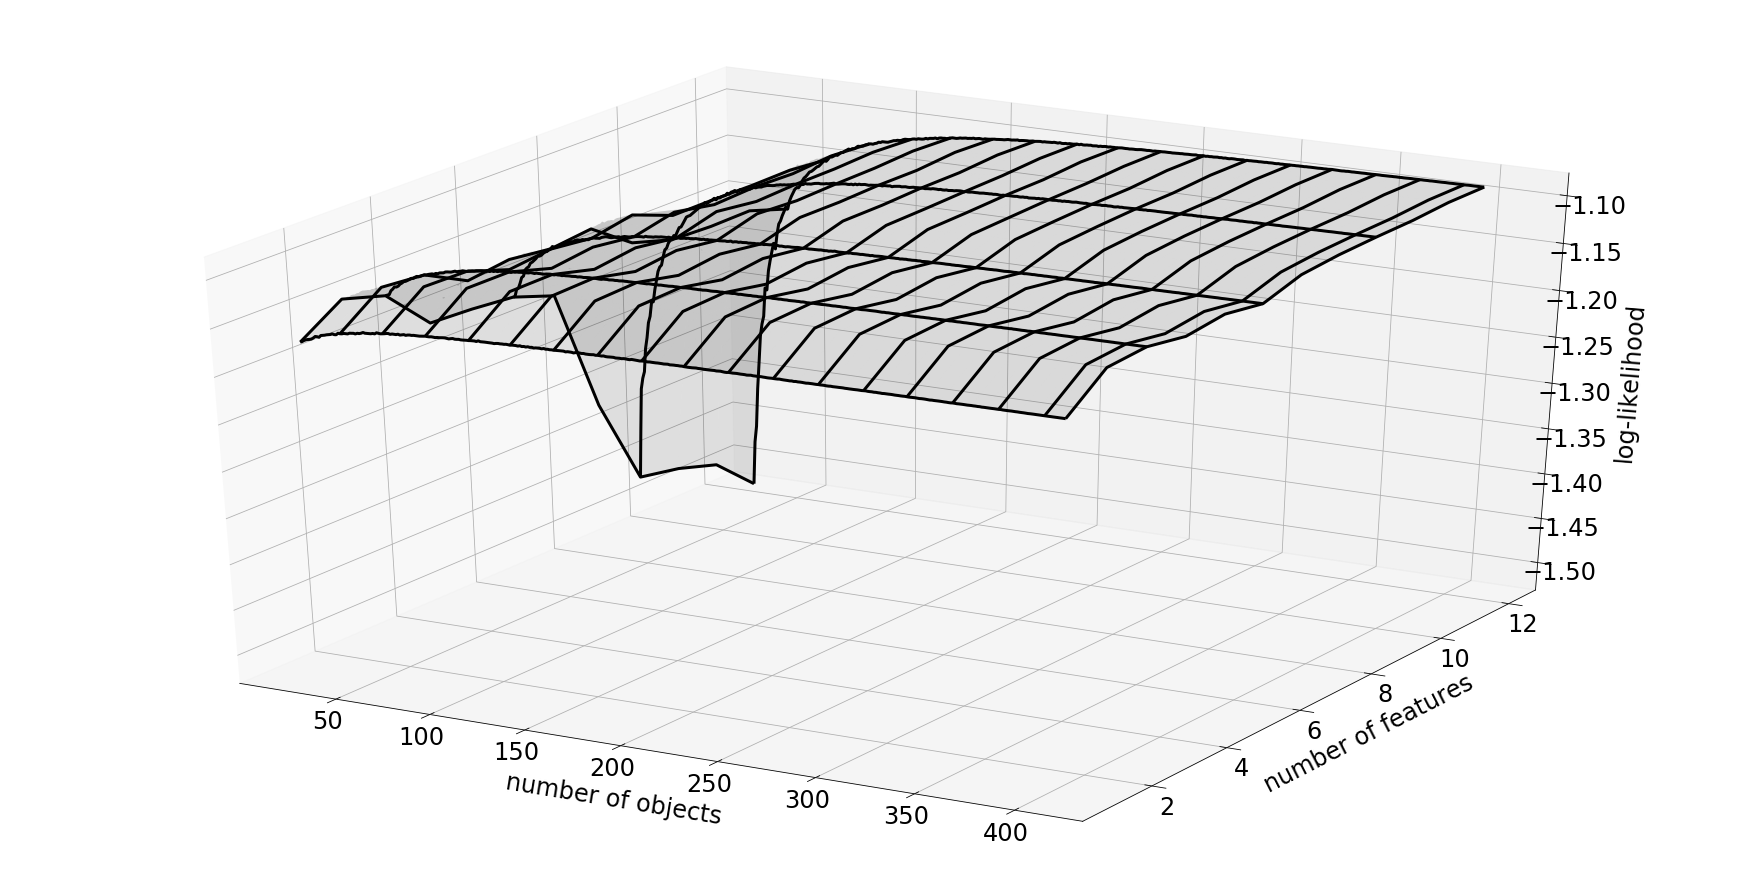

In [9]:
x = SampleStep
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))

xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean)

fig = plt.figure()
axes = Axes3D(fig)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=3, cstride=20, color ='black')
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.1, color ='black')

axes.set_xlabel("number of objects", labelpad=30)
axes.set_ylabel("number of features", labelpad=20)
axes.set_zlabel("log-likelihood", labelpad=20)

plt.show()



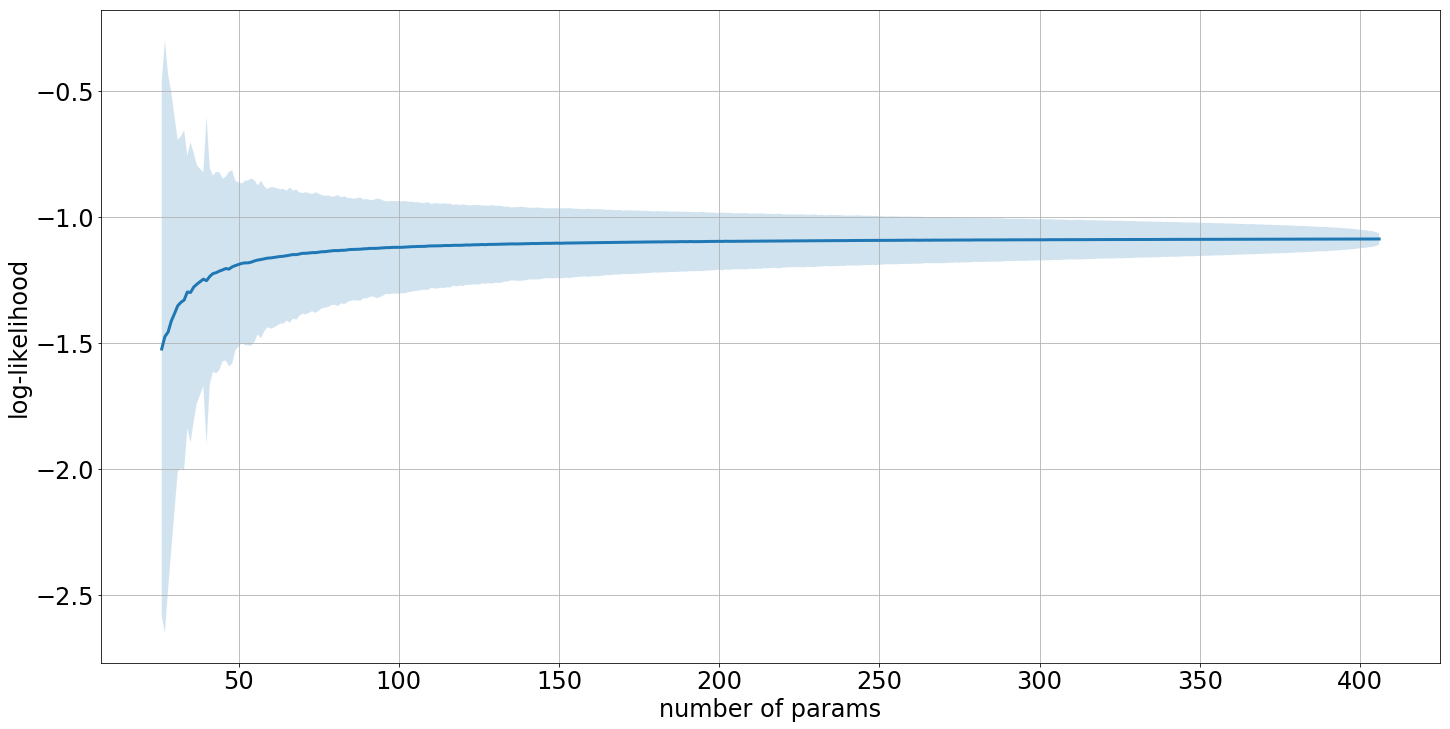

In [10]:
N = 0
mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean)
plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2)

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.show()

In [11]:
np.random.rand(0)

M_SampleStep = [50 - l, 100 - l, 150 - l, 200 - l, 250 - l, 300-l]

SampleStep_approximate = np.linspace(l, 500, 100, dtype=np.int64)

List_of_mean_approximation, List_of_std_approximation = get_graph(SampleStep = SampleStep, 
                                                                  List_mean = List_mean, 
                                                                  SampleStep_approximate = SampleStep_approximate, 
                                                                  M_SampleStep = M_SampleStep, 
                                                                  n = n, 
                                                                  k_for_meaning = 100, 
                                                                  print_progres = True)

List_of_std_approximation = np.array(List_of_std_approximation)
List_of_mean_approximation = np.array(List_of_mean_approximation)

100%|██████████| 6/6 [01:26<00:00, 14.67s/it]


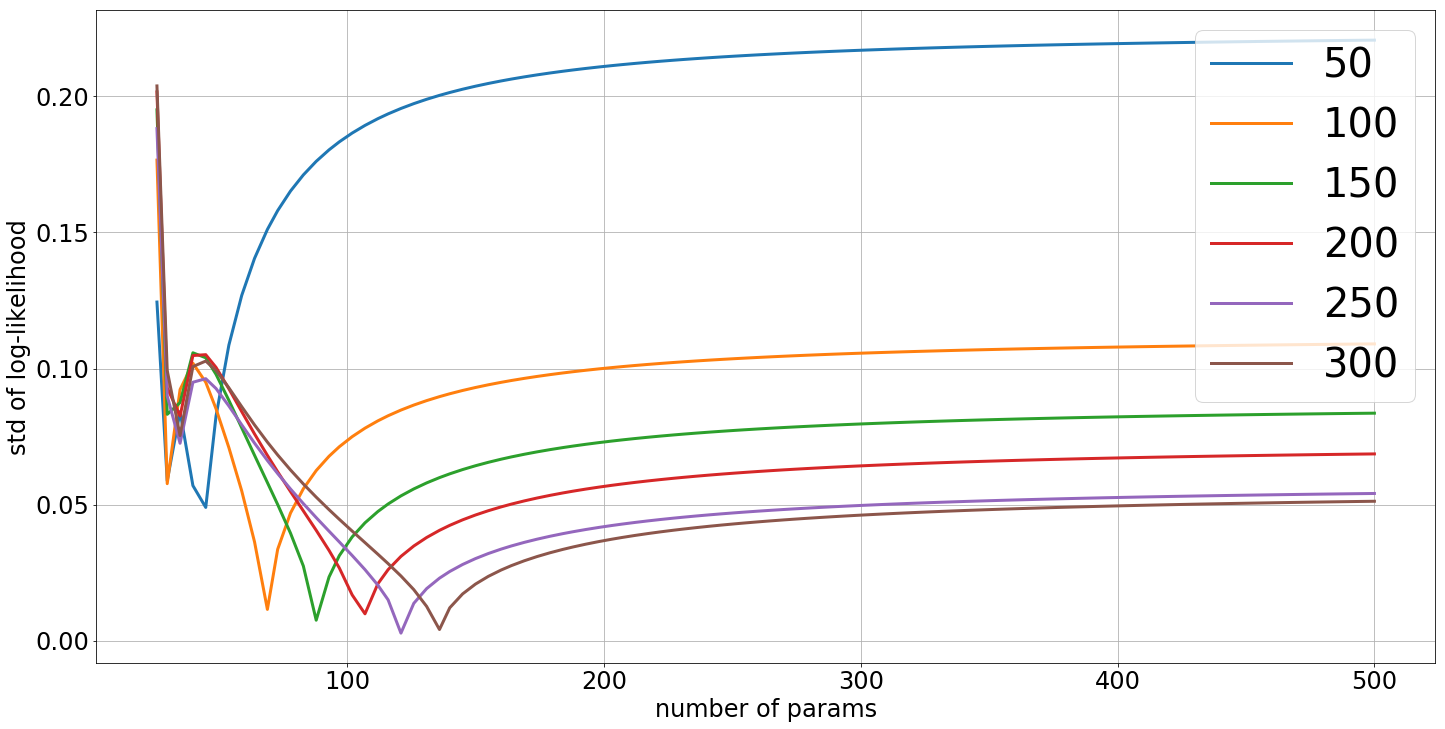

In [12]:
N = 0

for i in range(List_of_std_approximation.shape[0]):
    mean = List_of_std_approximation[i, N]
    std = np.sqrt(List_of_std_approximation[i, N])
    plt.plot(SampleStep_approximate, std, label = str(M_SampleStep[i] +l))

plt.legend(loc = 'best')
plt.xlabel('number of params')
plt.ylabel('std of log-likelihood')
plt.grid()

plt.savefig("./figures/boston_changing_std_5000.pdf")

plt.show()

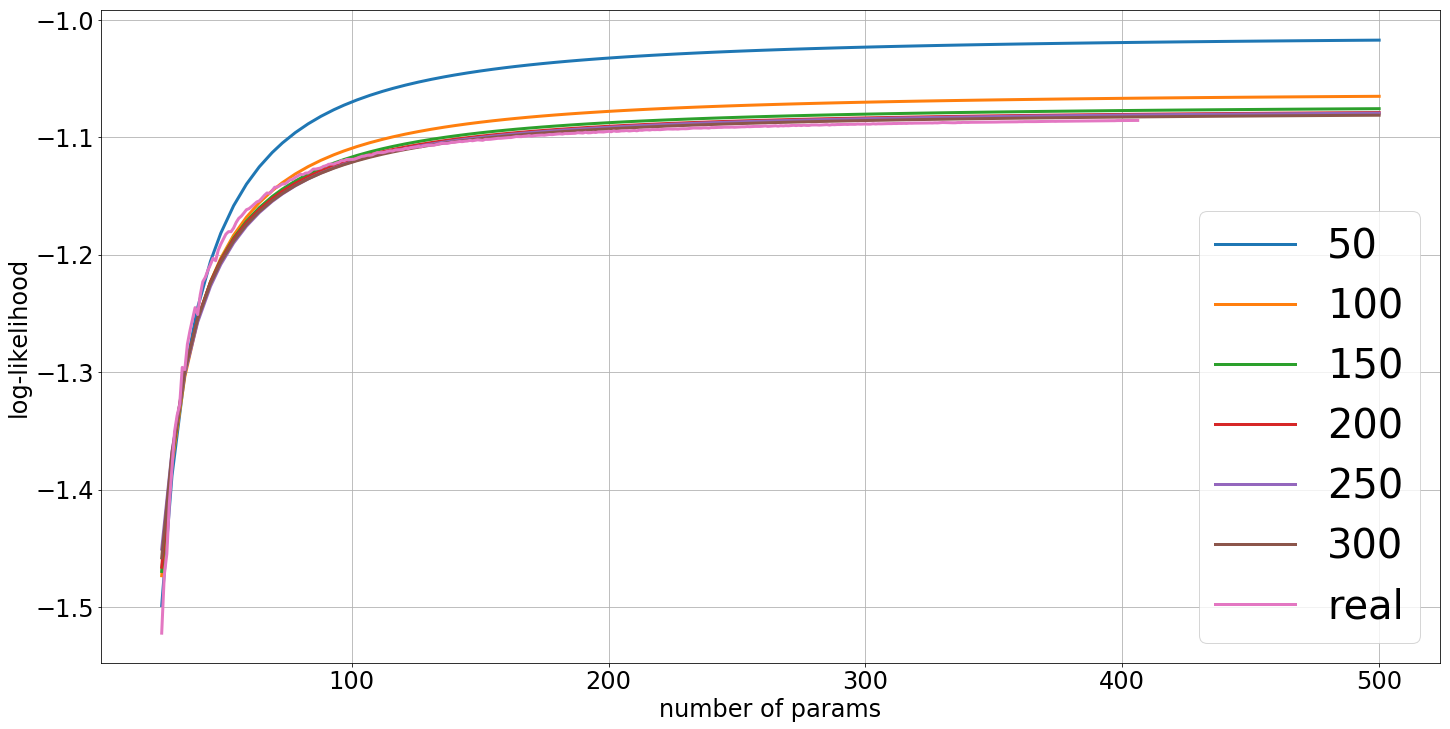

In [13]:
N = 0

for i in range(List_of_std_approximation.shape[0]):
    mean = List_of_mean_approximation[i, N]
    std = np.sqrt(List_of_std_approximation[i, N])
    plt.plot(SampleStep_approximate, mean, label = str(M_SampleStep[i] +l))
    
mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, label = 'real')

plt.legend(loc = 'best')
plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.savefig("./figures/boston_changing_mean_5000.pdf")

plt.show()

In [14]:
List_mean_approximate = List_of_mean_approximation[0]
List_std_approximate = List_of_std_approximation[0]


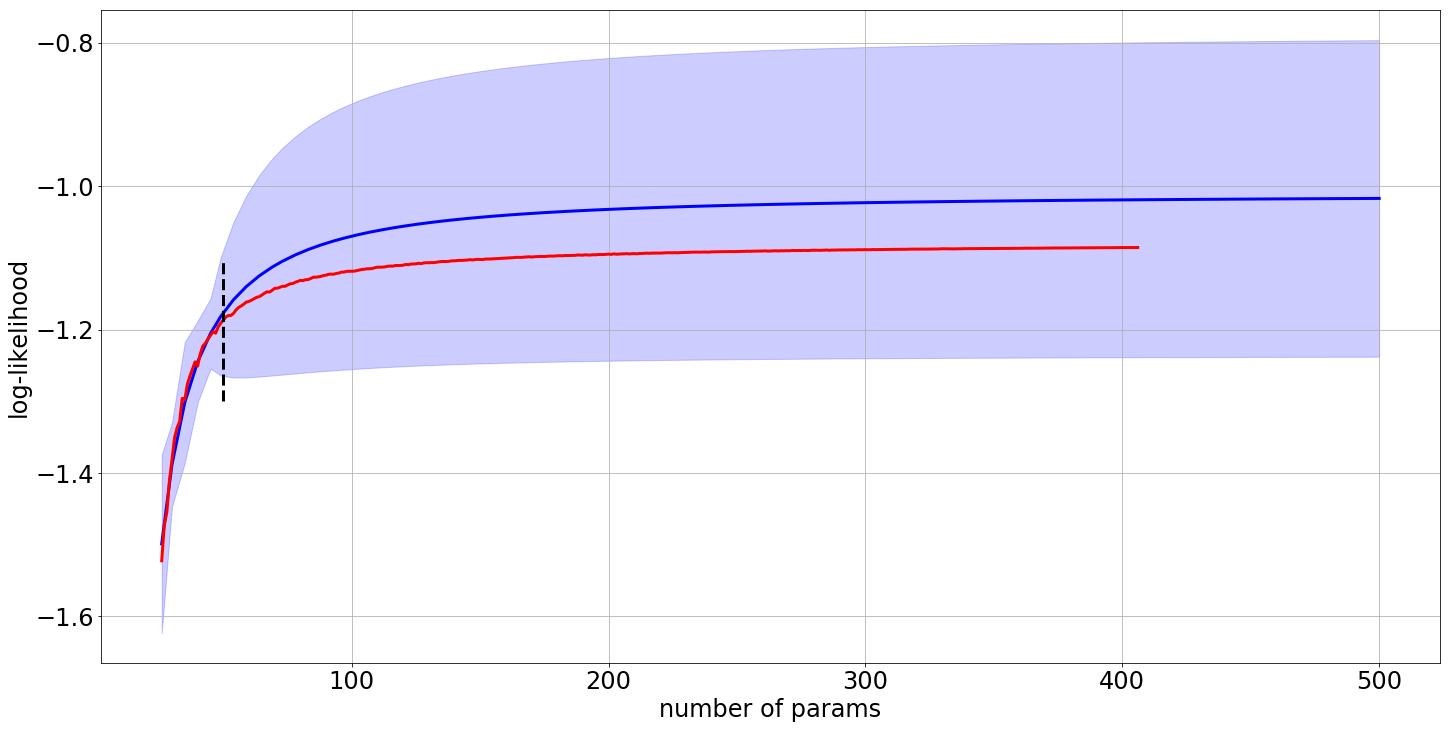

In [15]:
N = 0
mean = np.array(List_mean_approximate[N])
std = np.array(List_std_approximate[N])

plt.plot(SampleStep_approximate, mean, color = 'blue')
plt.fill_between(SampleStep_approximate, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'blue')

mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, color = 'red')
# plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'red')

plt.plot(50*np.ones(100), np.linspace(-1.3,-1.1, 100), "--", color = 'black')

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.show()

# Diabetes

In [16]:
l = 20

In [17]:
M = 50

In [19]:
ordering, SampleStep, List_mean, List_std, X_train, y_train, X_test, y_test = pickle.load(open("saved_graph/diabets5000.p", "rb"))


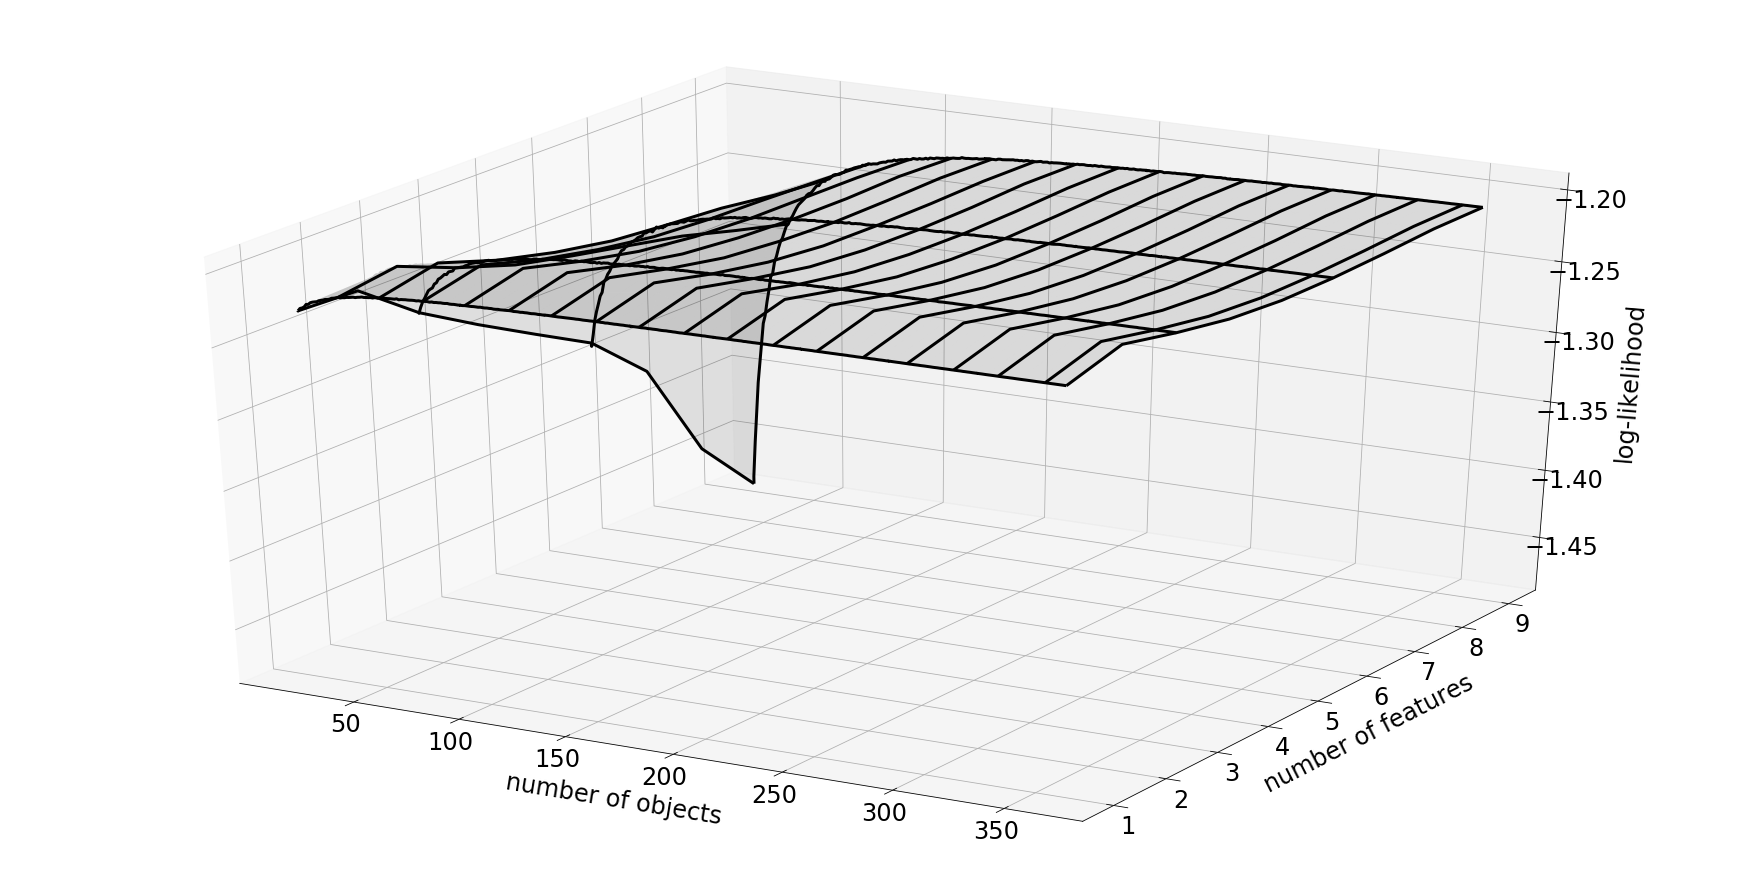

In [20]:
x = SampleStep
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))

xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean)

fig = plt.figure()
axes = Axes3D(fig)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=3, cstride=20, color ='black')
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.1, color ='black')

axes.set_xlabel("number of objects", labelpad=30)
axes.set_ylabel("number of features", labelpad=20)
axes.set_zlabel("log-likelihood", labelpad=20)

plt.show()



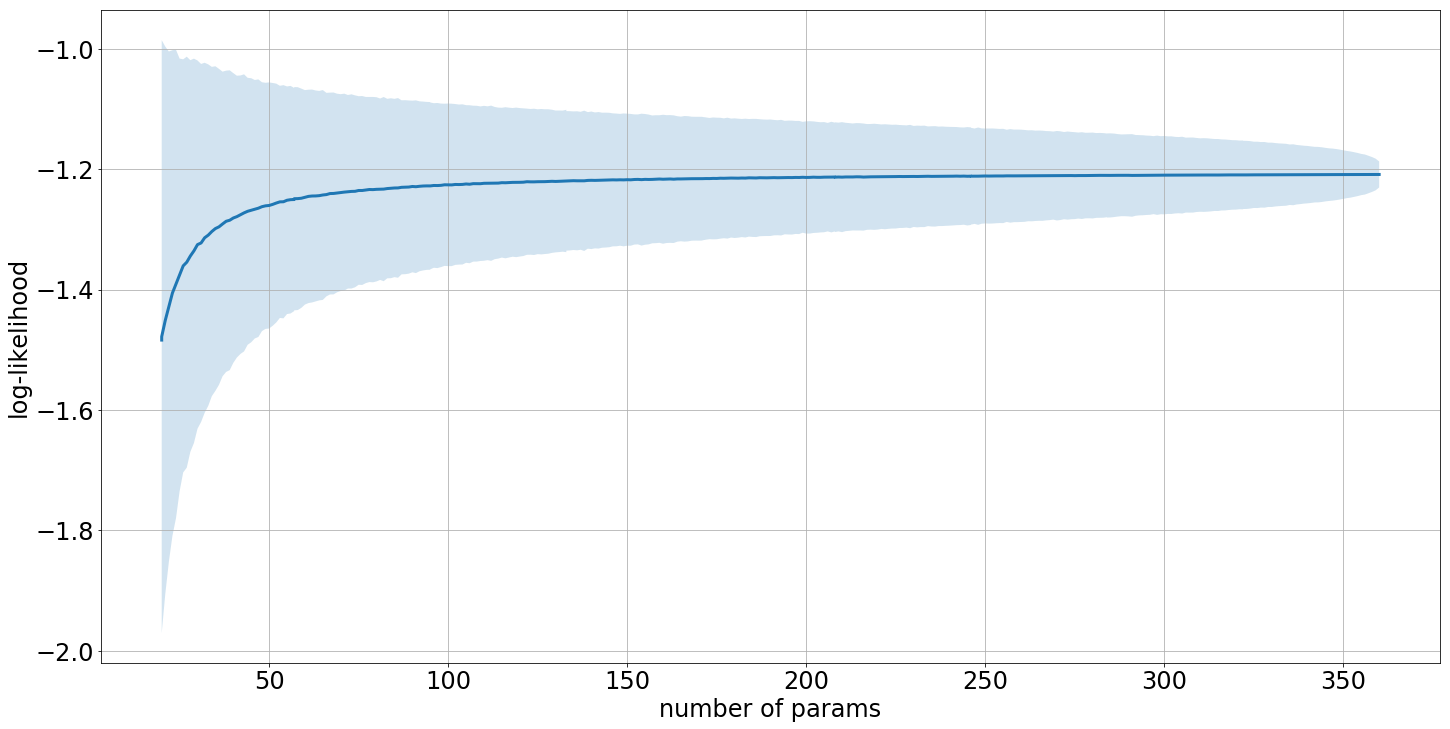

In [21]:
N = 0
mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean)
plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2)

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.show()

In [22]:
np.random.rand(0)

M_SampleStep = [50 - l, 100 - l, 150 - l, 200 - l, 250 - l, 300-l]

SampleStep_approximate = np.linspace(l, 500, 100, dtype=np.int64)

List_of_mean_approximation, List_of_std_approximation = get_graph(SampleStep = SampleStep, 
                                                                  List_mean = List_mean, 
                                                                  SampleStep_approximate = SampleStep_approximate, 
                                                                  M_SampleStep = M_SampleStep, 
                                                                  n = n, 
                                                                  k_for_meaning = 100, 
                                                                  print_progres = True)

List_of_std_approximation = np.array(List_of_std_approximation)
List_of_mean_approximation = np.array(List_of_mean_approximation)

100%|██████████| 6/6 [00:58<00:00, 10.17s/it]


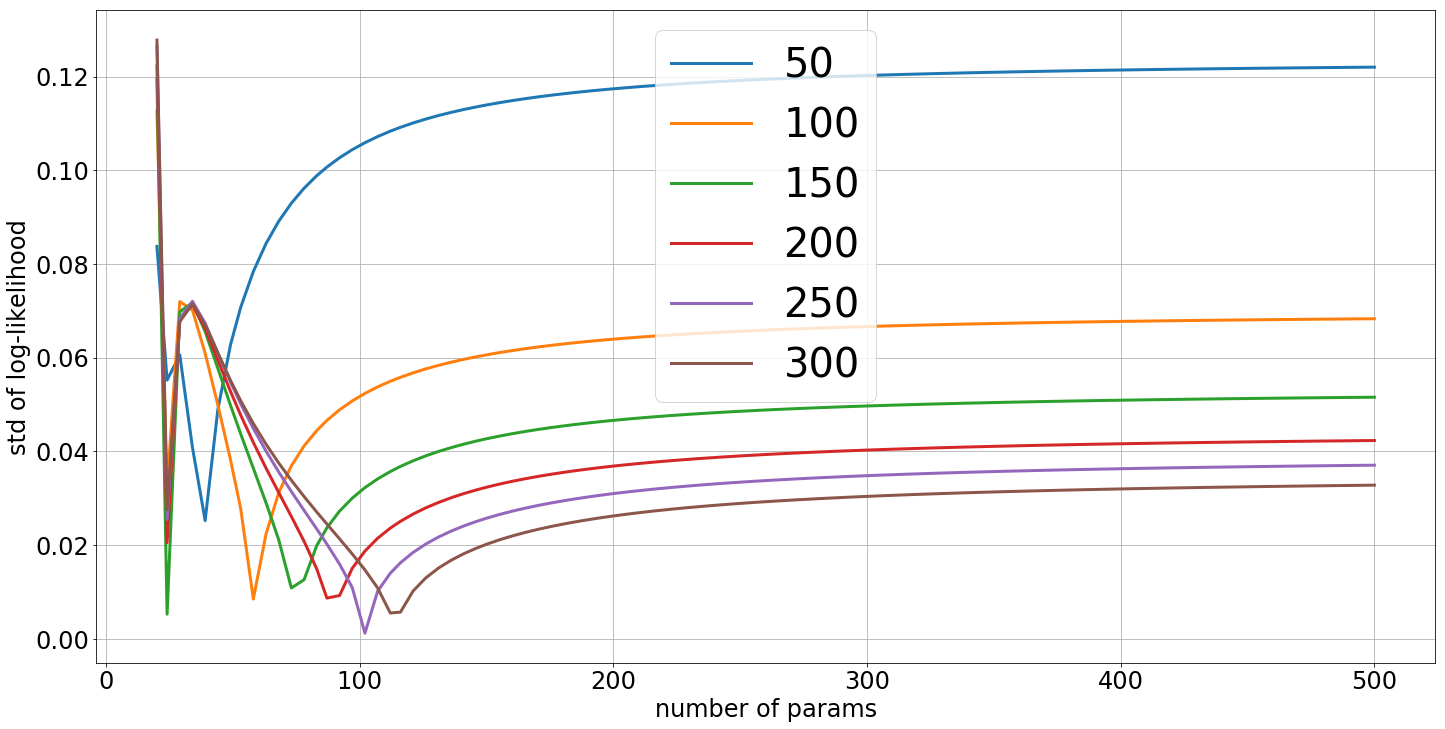

In [23]:
N = 0

for i in range(List_of_std_approximation.shape[0]):
    mean = List_of_std_approximation[i, N]
    std = np.sqrt(List_of_std_approximation[i, N])
    plt.plot(SampleStep_approximate, std, label = str(M_SampleStep[i] +l))

plt.legend(loc = 'best')
plt.xlabel('number of params')
plt.ylabel('std of log-likelihood')
plt.grid()

plt.savefig("./figures/diabetes_changing_std_5000.pdf")

plt.show()

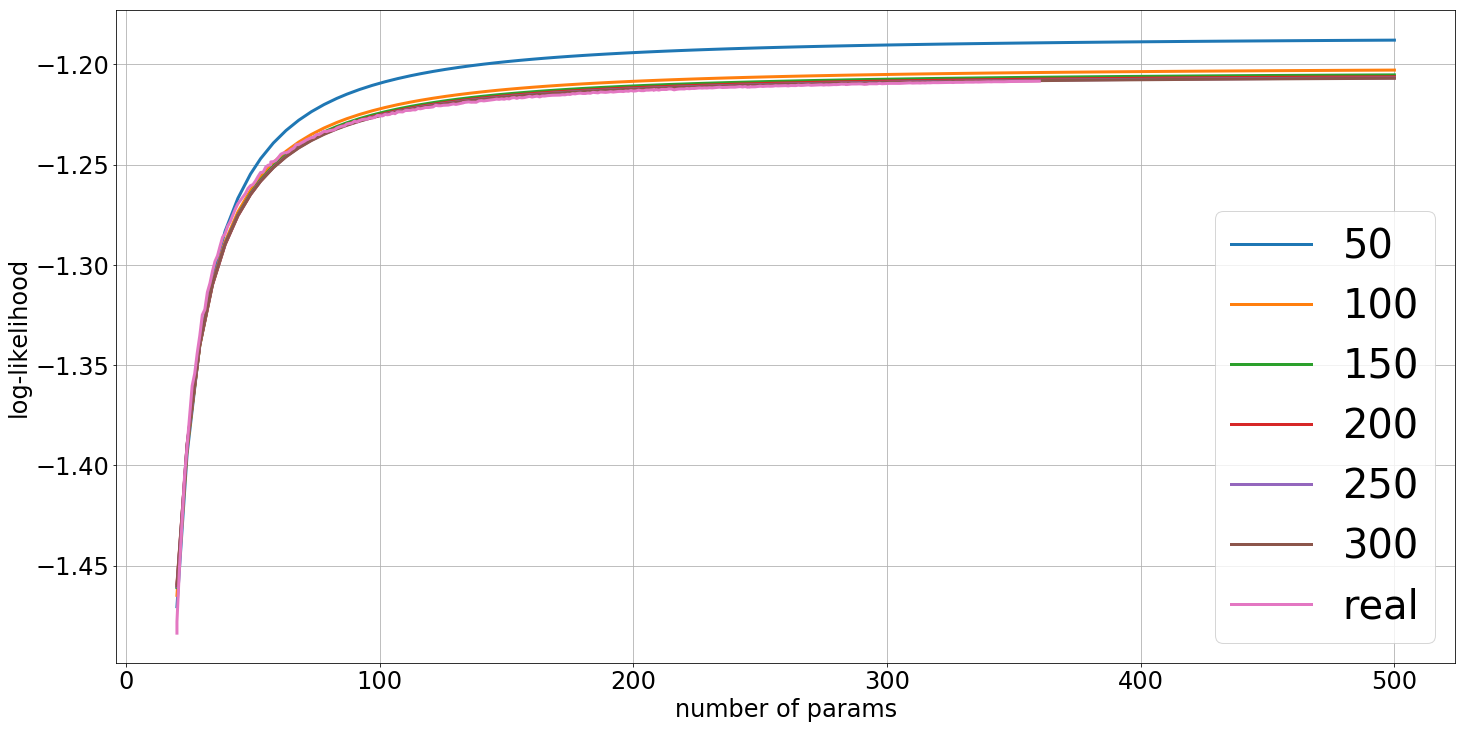

In [24]:
N = 0

for i in range(List_of_std_approximation.shape[0]):
    mean = List_of_mean_approximation[i, N]
    std = np.sqrt(List_of_std_approximation[i, N])
    plt.plot(SampleStep_approximate, mean, label = str(M_SampleStep[i] +l))
    
mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, label = 'real')

plt.legend(loc = 'best')
plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.savefig("./figures/diabetes_changing_mean_5000.pdf")

plt.show()

In [25]:
List_mean_approximate = List_of_mean_approximation[0]
List_std_approximate = List_of_std_approximation[0]


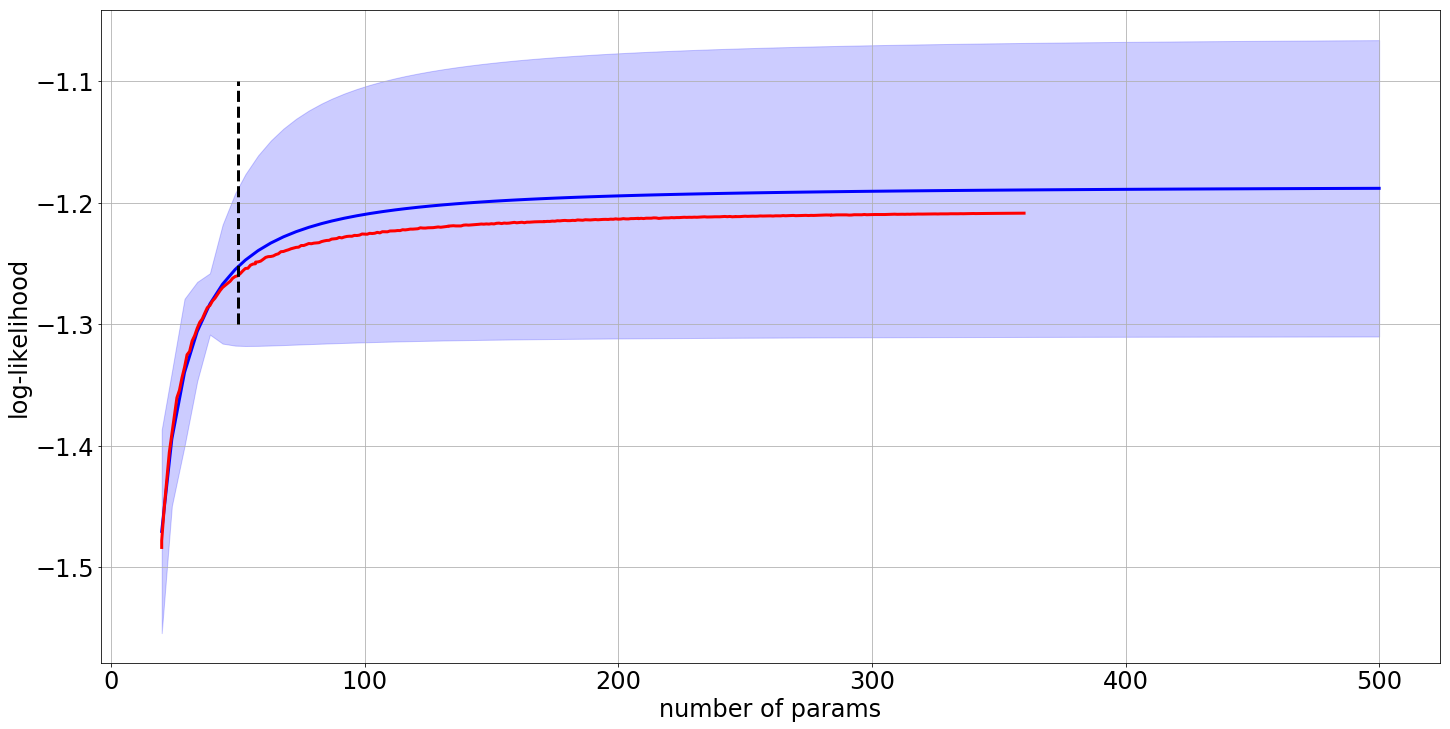

In [26]:
N = 0
mean = np.array(List_mean_approximate[N])
std = np.array(List_std_approximate[N])

plt.plot(SampleStep_approximate, mean, color = 'blue')
plt.fill_between(SampleStep_approximate, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'blue')

mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, color = 'red')
# plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'red')

plt.plot(50*np.ones(100), np.linspace(-1.3,-1.1, 100), "--", color = 'black')

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.show()